#### **Ejercicio:** Ejercicio de predicción de precios de viviendas

**Elaborado por:** Fabian Villarreal Sosa

Kaggle alberga un conjunto de datos que contiene los precios de venta de viviendas para el condado de King, que incluye Seattle. Puedes descargar el conjunto de datos de Kaggle. Tu tarea es realizar bagged trees y técnicas de regresión forestal aleatoria en el conjunto de datos para predecir el precio a partir de sus características.

https://www.kaggle.com/harlfoxem/housesalesprediction

**Preguntas para pensar y responder**

Una vez que hayas completado la tarea, responde las siguientes preguntas.

1. ¿Cuáles son las características más importantes de tu modelo?
2. ¿Qué otros parámetros podrías haber intentado ajustar?

In [62]:
# Librerias
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

from google.colab import drive

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn import metrics

In [63]:
# Acceder a directorio en Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
# Determinar directorio
os.chdir('/content/drive/MyDrive/Coding Dojo/Datos')
os.getcwd()

'/content/drive/MyDrive/Coding Dojo/Datos'

In [65]:
# Datos
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [66]:
columns_nan = df.columns[df.isna().any()]
columns_nan 
# No hay datos perdidos

Index([], dtype='object')

In [67]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


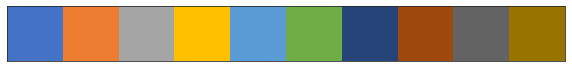

In [68]:
# Estilo de los graficos
sns.set_style('white')

# Paleta de colores Excel
my_palette=['#4472C4', '#ED7D31', '#A5A5A5', '#FFC000', '#5B9BD5', '#70AD47', '#264478', '#9E480E', '#636363', '#997300'] # Colores de Microsoft Excel
sns.palplot(sns.color_palette(my_palette, 10))

# Definir paleta
sns.set_palette(my_palette)

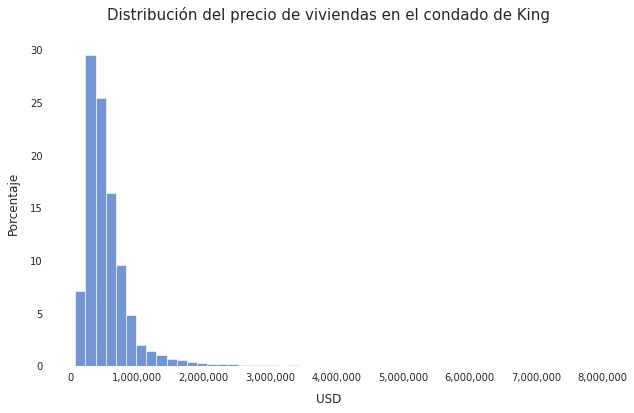

In [69]:
# Distribucion de los precios
p1 = sns.histplot(data = df, x = 'price', stat = 'percent', bins=50, color = my_palette[0])
plt.title('Distribución del precio de viviendas en el condado de King', fontsize = 15, pad = 20)
plt.ylabel('Porcentaje', fontsize = 12, labelpad = 10)
plt.xlabel('USD', fontsize = 12, labelpad = 10)
p1.set_xticklabels('{:,.0f}'.format(x) for x in p1.get_xticks())
sns.despine(left = True, bottom = True)
plt.gcf().set_size_inches(10, 6);

In [70]:
# Debido a que el precio es una variable continua, se implementa los bagged trees y random forest para abordar una regresión y no una clasificación

In [71]:
# Matriz de caracteristicas y vector objetivo
X_var = df.drop(columns = ['id', 'date', 'price']).columns
X = df.loc[:, X_var]

y = df.loc[:, 'price'].values

print('X dimensions: ', X.shape)
print('y dimensions: ', y.shape)

X dimensions:  (21613, 18)
y dimensions:  (21613,)


In [72]:
# Division de datos en entrenamiento y prueba
np.random.seed(2731)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2731)

**Bagged Trees**

In [73]:
# Libreria
from sklearn.ensemble import BaggingRegressor

In [74]:
# Definir funcion para estimar el modelo
def regress(model, X_train, y_train, X_test, y_test):
  np.random.seed(2731) # seed

  # Estimacion
  model.fit(X_train, y_train)

  # Predicciones
  y_hat_train = model.predict(X_train)
  y_hat_test = model.predict(X_test)

  # Metricas
  score_train = model.score(X_train, y_train)
  score_test = model.score(X_test, y_test)

  # Resultados
  print("\nReporte del Modelo\n")

  print(f'Score (Train): {score_train:.3f}')
  print(f'Score (Test): {score_test:.3f}')  

In [75]:
# Estimacion de Bagged Trees
bag_regress = BaggingRegressor(n_estimators = 100,
                               bootstrap = True, 
                               random_state = 2731)

regress(bag_regress, X_train, y_train, X_test, y_test)


Reporte del Modelo

Score (Train): 0.981
Score (Test): 0.891


In [76]:
# Lista de valores para probar el parametro n_estimators
estimator_range = [1] + list(range(10, 210, 10))
np.array(estimator_range)

array([  1,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200])

In [77]:
# Lista para almacenar las precisiones promedio para cada valor de n_estimators:
scores = []
for estimator in estimator_range:
  bag_regress = BaggingRegressor(n_estimators = estimator, bootstrap = True, random_state = 2731)
  bag_regress.fit(X_train, y_train)
  score = bag_regress.score(X_test, y_test)
  scores.append(score)

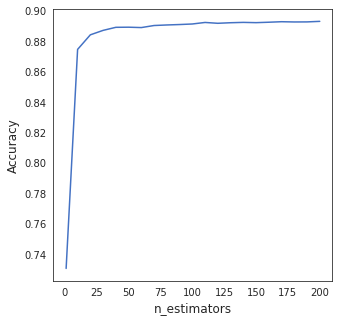

In [78]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5, 5))
axes.plot(estimator_range, scores)
axes.set_xlabel('n_estimators', fontsize = 12)
axes.set_ylabel('Accuracy', fontsize = 12);

In [79]:
# Con base en el score de las estimaciones, cambiando el parametro de 'n_estimators', se debería optar por 200.
# No obstante, se puede observar que el incremento en la precision es marginal a medida que se avanza en la cantidad de estimadores, desde aproximadamente 50-75, en adelante.

# Estimacion de Bagged Trees
bag_regress = BaggingRegressor(n_estimators = 200,
                               bootstrap = True, 
                               random_state = 2731)

regress(bag_regress, X_train, y_train, X_test, y_test)


Reporte del Modelo

Score (Train): 0.982
Score (Test): 0.893


**Random forest**

In [80]:
# Libreria
from sklearn.ensemble import RandomForestRegressor

In [81]:
# Estimacion de Bagged Trees
rfor_regress = RandomForestRegressor(n_estimators = 100,
                                     bootstrap = True,
                                     random_state = 2731)

regress(rfor_regress, X_train, y_train, X_test, y_test)


Reporte del Modelo

Score (Train): 0.981
Score (Test): 0.891


In [82]:
# Lista de valores para probar el parametro n_estimators
estimator_range = [1] + list(range(10, 210, 10))
np.array(estimator_range)

array([  1,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200])

In [83]:
# Lista para almacenar las precisiones promedio para cada valor de n_estimators:
scores = []
for estimator in estimator_range:
  rfor_regress = RandomForestRegressor(n_estimators = estimator, bootstrap = True, random_state = 2731)
  rfor_regress.fit(X_train, y_train)
  score = rfor_regress.score(X_test, y_test)
  scores.append(score)

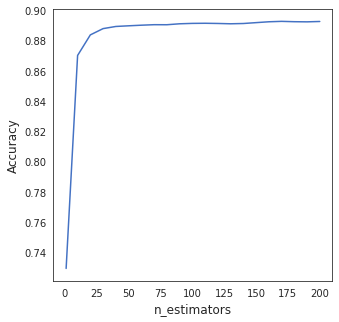

In [84]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5, 5))
axes.plot(estimator_range, scores)
axes.set_xlabel('n_estimators', fontsize = 12)
axes.set_ylabel('Accuracy', fontsize = 12);

In [85]:
# Al igual que con 'BaggingRegressor', con base en el score de las estimaciones, cambiando el parametro de 'n_estimators', se debería optar por 200.
# No obstante, se puede observar que el incremento en la precision es marginal a medida que se avanza en la cantidad de estimadores, desde aproximadamente 50-75, en adelante.

# Estimacion de Bagged Trees
rfor_regress = RandomForestRegressor(n_estimators = 200,
                                     bootstrap = True,
                                     random_state = 2731)

regress(rfor_regress, X_train, y_train, X_test, y_test)


Reporte del Modelo

Score (Train): 0.981
Score (Test): 0.893


¿Cuáles son las características más importantes de tu modelo?

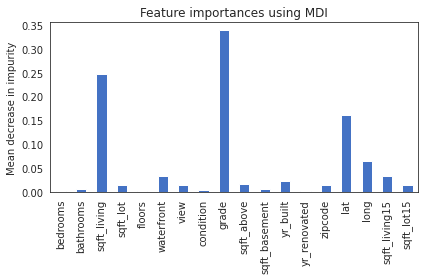

In [86]:
# Caracteristicas importantes del modelo
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
caracteristicas_rfor = rfor_regress.feature_importances_

forest_features = pd.Series(caracteristicas_rfor, index = X_var)

fig, ax = plt.subplots()
forest_features.plot.bar(ax = ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [87]:
# Con base en la disminución media de la impureza (MDI), la caracteristica mas importante es 'grade', seguido de 'sqft_living' y 'lat'.

¿Qué otros parámetros podrías haber intentado ajustar?

In [88]:
# Adicionalmente, al numero con respecto al parametro 'n_estimators', tambien se puedo haber probado ajustes con en la profundidad del arbol,
# es decir, la cantidad de divisiones antes de llegar a prediccion (max_depth), o la cantidad de muestras minimas requeridas en cada nodo intermedio
# o de decision (min_samples_split) o la cantidad de muestras minimas requeridas en nodo de eleccion u hoja (min_samples_leaf), entre otros.